In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from scipy import stats
import numpy as np

scaler = StandardScaler()

In [2]:
df = pd.read_csv('census.csv')

In [3]:
df.isnull().any()

age               False
workclass         False
final-weight      False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loos      False
hour-per-week     False
native-country    False
income            False
dtype: bool

In [4]:
df['sex'].replace({' Male':0, ' Female':1}, inplace = True)
df['income'].replace({' <=50K':0, ' >50K':1}, inplace = True)
df['native-country'].replace({' ?':' United-States'}, inplace = True)
# Trocaremos o valor "?" por Estados Unidos, visto que 89.58% do dataframe possui esse valor.

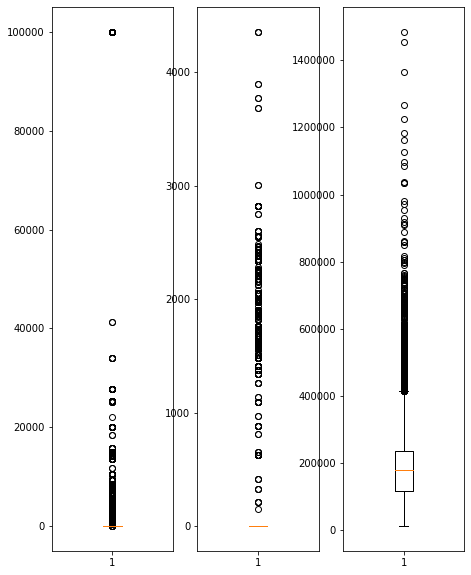

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.boxplot(df['capital-gain']);
plt.subplot(1,4,2)
plt.boxplot(df['capital-loos']);
plt.subplot(1,4,3)
plt.boxplot(df['final-weight']);
plt.show()
# Vemos uma vasta presença de outliers 

In [6]:
z_scores = stats.zscore(df[['capital-gain','capital-loos','final-weight']])

In [7]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
# Filtramos os outliers de acordo com o cálculo do z score.

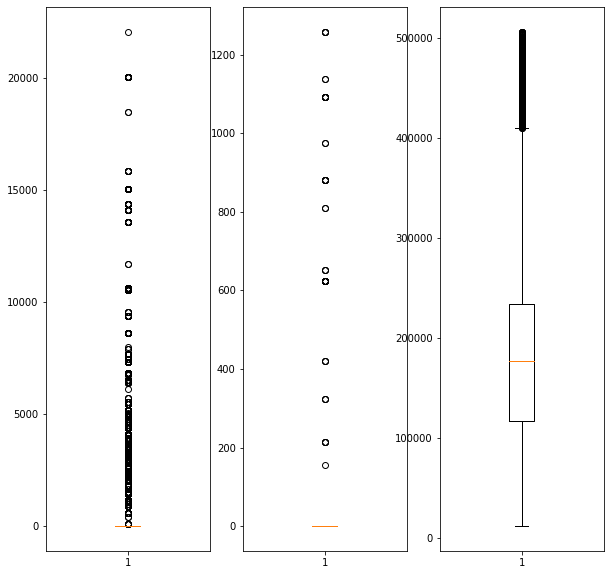

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.boxplot(new_df['capital-gain']);
plt.subplot(1,3,2)
plt.boxplot(new_df['capital-loos']);
plt.subplot(1,3,3)
plt.boxplot(new_df['final-weight']);
plt.show()

In [9]:
new_df = pd.get_dummies(new_df, prefix = ['marital-status','occupation','relationship','workclass','race','native-country','education'])

In [10]:
# Income será nossa target label
Y = new_df['income']

In [11]:
X = new_df.loc[:, new_df.columns != 'income']

In [12]:
X = scaler.fit_transform(X)

In [13]:
Y.value_counts()
# É um problema nitidamente desbalanceado, mas que talvez esse desbalanceamento reflita a realidade, por isso resolvi preservar

0    23753
1     6788
Name: income, dtype: int64

In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, stratify = Y, random_state = 301, test_size = 0.1)

In [15]:
Rf = RandomForestClassifier()
XGB = GradientBoostingClassifier()

In [16]:
Rf.fit(x_treino,y_treino);
XGB.fit(x_treino, y_treino);

In [17]:
rf_predicts = Rf.predict(x_teste)
xg_predicts = XGB.predict(x_teste)

In [18]:
print("Random forest score: {}%".format(Rf.score(x_teste,y_teste)*100))
print("XGB score: {}%".format(XGB.score(x_teste,y_teste)*100))

Random forest score: 85.00818330605566%
XGB score: 85.85924713584288%


In [19]:
confusion_matrix(y_teste,xg_predicts)

array([[2246,  130],
       [ 302,  377]])

In [20]:
confusion_matrix(y_teste,rf_predicts)

array([[2203,  173],
       [ 285,  394]])

In [21]:
print(classification_report(y_teste,rf_predicts))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2376
           1       0.69      0.58      0.63       679

    accuracy                           0.85      3055
   macro avg       0.79      0.75      0.77      3055
weighted avg       0.84      0.85      0.85      3055



In [22]:
print(classification_report(y_teste,xg_predicts))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2376
           1       0.74      0.56      0.64       679

    accuracy                           0.86      3055
   macro avg       0.81      0.75      0.77      3055
weighted avg       0.85      0.86      0.85      3055



In [25]:
downsampling = resample(new_df[new_df['income'] == 0], n_samples = len(new_df[new_df['income'] == 1]))

In [26]:
downsampling

,age,final-weight,education-num,sex,capital-gain,capital-loos,hour-per-week,income,marital-status_ ?,marital-status_ Federal-gov,...,education_ Portugal,education_ Puerto-Rico,education_ Scotland,education_ South,education_ Taiwan,education_ Thailand,education_ Trinadad&Tobago,education_ United-States,education_ Vietnam,education_ Yugoslavia
20418,28,122540,6,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20965,26,109609,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24352,18,184693,10,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26971,38,255621,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19488,32,328199,11,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23810,43,227734,11,0,0,0,22,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1174,47,183013,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22819,32,191731,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15946,33,391122,9,1,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
final_df = pd.concat([downsampling, new_df[new_df['income'] == 1]])

In [28]:
final_df

,age,final-weight,education-num,sex,capital-gain,capital-loos,hour-per-week,income,marital-status_ ?,marital-status_ Federal-gov,...,education_ Portugal,education_ Puerto-Rico,education_ Scotland,education_ South,education_ Taiwan,education_ Thailand,education_ Trinadad&Tobago,education_ United-States,education_ Vietnam,education_ Yugoslavia
20418,28,122540,6,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20965,26,109609,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24352,18,184693,10,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26971,38,255621,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19488,32,328199,11,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,287372,16,0,0,0,10,1,1,0,...,0,0,0,0,0,0,0,1,0,0
32545,39,111499,12,1,0,0,20,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32554,53,321865,14,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
X_bal = final_df.loc[:, final_df.columns != 'income']
Y_bal = final_df.loc[:, 'income']

In [34]:
x_bal_treino, x_bal_teste, y_bal_treino, y_bal_teste = train_test_split(X_bal, Y_bal, test_size = 0.1, stratify = Y_bal, random_state = 301)

In [36]:
XGB.fit(x_bal_treino, y_bal_treino)

GradientBoostingClassifier()

In [38]:
print(classification_report(XGB.predict(x_bal_teste), y_bal_teste))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       650
           1       0.85      0.82      0.84       708

    accuracy                           0.83      1358
   macro avg       0.83      0.83      0.83      1358
weighted avg       0.83      0.83      0.83      1358



In [39]:
Rf.fit(x_bal_treino,y_bal_treino)

RandomForestClassifier()

In [40]:
print(classification_report(Rf.predict(x_bal_teste), y_bal_teste))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       712
           1       0.80      0.84      0.82       646

    accuracy                           0.83      1358
   macro avg       0.83      0.83      0.83      1358
weighted avg       0.83      0.83      0.83      1358



In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
classifier = GaussianNB()

In [43]:
classifier.fit(x_bal_treino, y_bal_treino)

GaussianNB()

In [44]:
print(classification_report(classifier.predict(x_bal_teste), y_bal_teste))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       907
           1       0.54      0.82      0.65       451

    accuracy                           0.71      1358
   macro avg       0.71      0.74      0.70      1358
weighted avg       0.77      0.71      0.72      1358

